<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/ML_Random_Forest_model_to_predict_trail_validity_TWINE_Round_15_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import joblib
import numpy as np

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=12q2SgUC5Q0BEz0qVg5rtlSaivGMsMH74"

--2024-07-03 05:05:20--  https://drive.google.com/uc?export=download&id=12q2SgUC5Q0BEz0qVg5rtlSaivGMsMH74
Resolving drive.google.com (drive.google.com)... 142.250.101.113, 142.250.101.101, 142.250.101.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12q2SgUC5Q0BEz0qVg5rtlSaivGMsMH74&export=download [following]
--2024-07-03 05:05:20--  https://drive.usercontent.google.com/download?id=12q2SgUC5Q0BEz0qVg5rtlSaivGMsMH74&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115357 (113K) [application/octet-stream]
Saving to: ‘all_dataset_path.csv’

all_dataset_path.cs 100%[===================>] 112.65

In [6]:
test_dataset =pd.read_csv ('all_dataset_path.csv')
test_dataset

,input16,input15,input14,input13,input12,input11,input10,input9,input8,input7,...,perm7,perm8,perm9,perm10,perm11,perm12,perm13,perm14,perm15,perm16
0,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
1,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
2,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
3,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
4,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1,1,1,1,1,1,1,0,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
534,1,1,1,1,1,1,1,1,0,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
535,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333
536,1,1,1,1,1,1,1,1,1,1,...,0.2,0.533333,0.866667,0.4,0.6,0.133333,1,0.666667,0.733333,0.933333


In [7]:
test_dataset['sboxes'] = ((test_dataset['sboxes']/(test_dataset['round']*8)))
test_dataset['sboxes']

0      0.091667
1      0.441667
2      2.566667
3      0.741667
4      1.233333
         ...   
533    0.900000
534    0.191667
535    2.791667
536    1.100000
537    1.616667
Name: sboxes, Length: 538, dtype: float64

In [8]:
test_labels = test_dataset.pop("validity")

In [9]:
test_dataset['round'] = (test_dataset['round'])/100

In [23]:
validity_file_id = '1aFK3EmVfEUtd5jW-fU4OCfb_c6UGOdZG'  # Replace 'your_file_id' with the actual file ID
output_file_name = 'validity_model_path.joblib'
!wget -O {output_file_name} "https://drive.google.com/uc?export=download&id={validity_file_id}"

--2024-07-03 05:15:43--  https://drive.google.com/uc?export=download&id=1aFK3EmVfEUtd5jW-fU4OCfb_c6UGOdZG
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.139, 142.250.101.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aFK3EmVfEUtd5jW-fU4OCfb_c6UGOdZG&export=download [following]
--2024-07-03 05:15:44--  https://drive.usercontent.google.com/download?id=1aFK3EmVfEUtd5jW-fU4OCfb_c6UGOdZG&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33079721 (32M) [application/octet-stream]
Saving to: ‘validity_model_path.joblib’

validity_model_path 100%[===================>]

In [24]:
# Load the saved Random Forest model
#model_path = '/content/drive/My Drive/Colab Notebooks/ML Models for Trail Validity/random_forest_model_validity.joblib'
model = joblib.load(output_file_name)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prediction
predictions = model.predict(test_dataset)

# Calculate Accuracy, Precision and Recall Metrics
accuracy= accuracy_score(predictions, test_labels)
precision = precision_score(predictions, test_labels)
recall = recall_score(predictions, test_labels)

In [26]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
import pandas as pd
d = {'Accuracy': [accuracy] , 'Precision': [precision], 'Recall' : [recall]}
df_model = pd.DataFrame(data=d)
df_model['Accuracy'] = accuracy
df_model['Precision'] = precision
df_model['Recall'] = recall

df_model

,Accuracy,Precision,Recall
0,0.960967,0.830189,0.967033


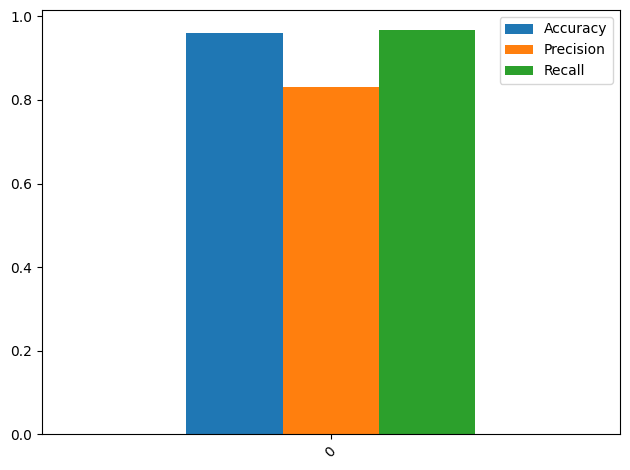

In [28]:
ax  = df_model.plot.bar(rot=45)
plt.tight_layout()

In [29]:
from sklearn.metrics import f1_score
f1_score(test_labels, predictions)

0.8934010152284264

In [30]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
y_preds = model.predict(test_dataset)
y_preds = np.round(predictions)
print("Classification Report: \n", classification_report(test_labels, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       432
           1       0.97      0.83      0.89       106

    accuracy                           0.96       538
   macro avg       0.96      0.91      0.93       538
weighted avg       0.96      0.96      0.96       538

